In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import rmse
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from prophet import Prophet
from prophet.plot import plot_plotly

/Users/edwardrodger/miniconda3/envs/final_project/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv("data/bicing_lunes_2_mini.csv")

In [3]:
df.isna().sum()

dateTime                             0
bikesInUsage                         0
electricalBikesInUsage               0
mechanicalBikesInUsage               0
is_weekend_or_bank_holiday           0
is_eve_of_weekend_or_bank_holiday    0
time_of_day                          0
temperature_2m                       0
rain                                 0
dtype: int64

In [4]:
df

,dateTime,bikesInUsage,electricalBikesInUsage,mechanicalBikesInUsage,is_weekend_or_bank_holiday,is_eve_of_weekend_or_bank_holiday,time_of_day,temperature_2m,rain
0,2018-08-01 17:00:00,662.500000,15.000000,647.500000,False,False,Afternoon,30.689999,0.0
1,2018-08-01 18:00:00,799.750000,12.250000,787.500000,False,False,Evening,30.240000,0.0
2,2018-08-01 19:00:00,754.750000,5.000000,749.750000,False,False,Evening,28.890000,0.0
3,2018-08-01 20:00:00,679.000000,7.000000,672.000000,False,False,Evening,27.390000,0.0
4,2018-08-01 21:00:00,577.500000,5.000000,572.500000,False,False,Evening,26.689999,0.0
...,...,...,...,...,...,...,...,...,...
1322,2018-09-25 19:00:00,920.000000,14.000000,906.000000,False,False,Evening,20.590000,0.0
1323,2018-09-25 20:00:00,323.421741,3.948718,319.473023,False,False,Evening,20.140000,0.0
1324,2018-09-25 21:00:00,323.421741,3.948718,319.473023,False,False,Evening,19.840000,0.0
1325,2018-09-25 22:00:00,323.421741,3.948718,319.473023,False,False,Evening,19.840000,0.0


In [5]:
df = df[["dateTime", "bikesInUsage"]]

In [6]:
df.head()

,dateTime,bikesInUsage
0,2018-08-01 17:00:00,662.50
1,2018-08-01 18:00:00,799.75
2,2018-08-01 19:00:00,754.75
3,2018-08-01 20:00:00,679.00
4,2018-08-01 21:00:00,577.50


In [7]:
df.columns = ['ds', 'y']

In [8]:
df.head()

,ds,y
0,2018-08-01 17:00:00,662.50
1,2018-08-01 18:00:00,799.75
2,2018-08-01 19:00:00,754.75
3,2018-08-01 20:00:00,679.00
4,2018-08-01 21:00:00,577.50


In [9]:
df['ds'] = pd.to_datetime(df['ds'])

/var/folders/q9/jkycd7cd6tqdf410bnlz4q2c0000gn/T/ipykernel_46842/3173280147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


In [10]:
df.tail()

,ds,y
1322,2018-09-25 19:00:00,920.000000
1323,2018-09-25 20:00:00,323.421741
1324,2018-09-25 21:00:00,323.421741
1325,2018-09-25 22:00:00,323.421741
1326,2018-09-25 23:00:00,323.421741


<Axes: xlabel='ds'>

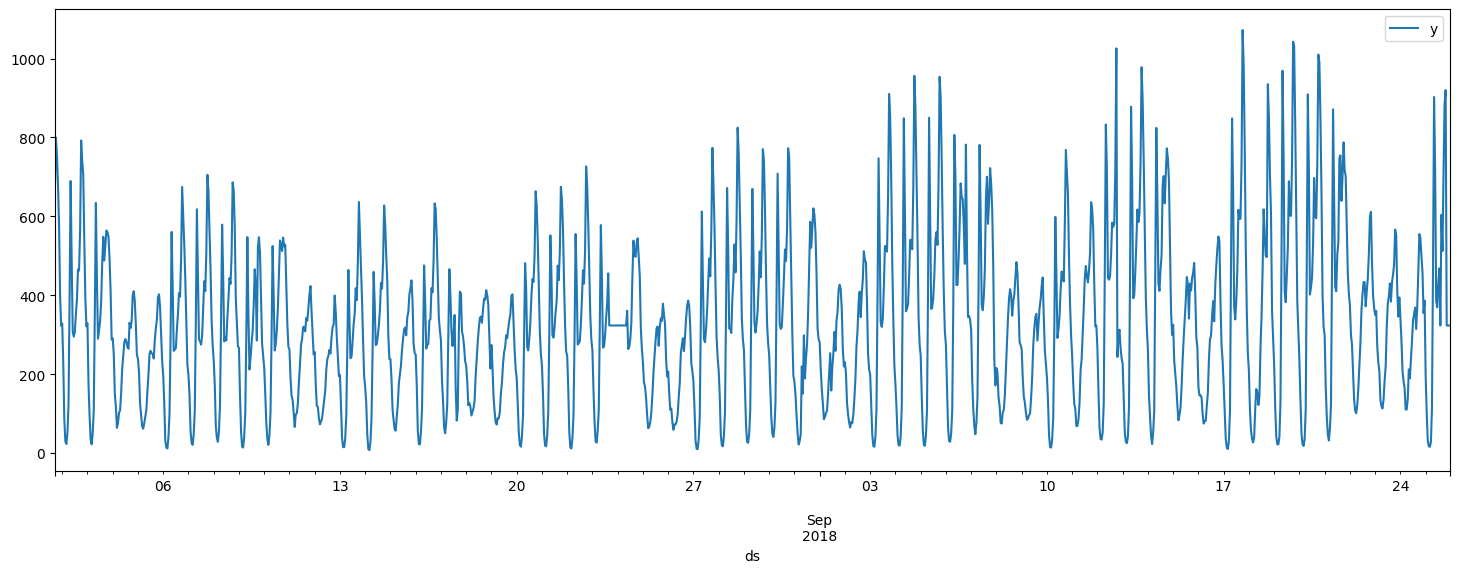

In [11]:
df.plot(x='ds', y='y', figsize = (18, 6))

In [12]:
len(df)

1327

In [14]:
train = df.iloc[:len(df)- 265]
test = df.iloc[len(df)- 265:]

In [15]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods = 265, freq = 'H')
forecast = m.predict(future)

23:27:23 - cmdstanpy - INFO - Chain [1] start processing
23:27:23 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1322,2018-09-25 19:00:00,424.197086,592.720147,858.008429,415.472774,433.594864,301.225878,301.225878,301.225878,268.415659,268.415659,268.415659,32.810219,32.810219,32.810219,0.0,0.0,0.0,725.422965
1323,2018-09-25 20:00:00,424.355766,561.877229,806.580808,415.572995,433.795012,254.469190,254.469190,254.469190,221.708706,221.708706,221.708706,32.760485,32.760485,32.760485,0.0,0.0,0.0,678.824957
1324,2018-09-25 21:00:00,424.514447,439.957335,697.051878,415.690869,433.992337,146.978815,146.978815,146.978815,114.232232,114.232232,114.232232,32.746583,32.746583,32.746583,0.0,0.0,0.0,571.493262
1325,2018-09-25 22:00:00,424.673127,330.480830,582.480048,415.811698,434.201617,31.147036,31.147036,31.147036,-1.623622,-1.623622,-1.623622,32.770657,32.770657,32.770657,0.0,0.0,0.0,455.820162
1326,2018-09-25 23:00:00,424.831807,261.446914,503.003101,415.920541,434.414037,-42.944566,-42.944566,-42.944566,-75.778429,-75.778429,-75.778429,32.833863,32.833863,32.833863,0.0,0.0,0.0,381.887241


In [17]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1322,2018-09-25 19:00:00,725.422965,592.720147,858.008429
1323,2018-09-25 20:00:00,678.824957,561.877229,806.580808
1324,2018-09-25 21:00:00,571.493262,439.957335,697.051878
1325,2018-09-25 22:00:00,455.820162,330.480830,582.480048
1326,2018-09-25 23:00:00,381.887241,261.446914,503.003101


In [18]:
predictions = forecast.iloc[-265:]['yhat']

In [19]:
print("RMSE: ", rmse(predictions,test['y']))
print("r2: ", metrics.r2_score(predictions,test['y']))

RMSE:  144.49773225483887
r2:  0.2729481666205512
